<a href="https://colab.research.google.com/github/SwatiUtekar/ML-Project/blob/main/EXP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
x= dataset.iloc[:,:9].values
y= dataset.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       130
           1       1.00      0.98      0.99        62

    accuracy                           0.99       192
   macro avg       1.00      0.99      0.99       192
weighted avg       0.99      0.99      0.99       192



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",cm)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Confusion Matrix: 
 [[130   0]
 [  1  61]]
Accuracy Score:  0.9947916666666666


Visualizing The Test Results

In [ ]:
# Select the 4th and 11th columns for visualization
x_visualization = x_train[:, [4, -1]] # Assuming 0-based indexing

In [ ]:
# Create a mesh grid for plotting
x1, x2 = np.meshgrid(np.arange(start=x_visualization[:, 0].min() - 1, stop=x_visualization[:,
0].max() + 1, step=0.01),
np.arange(start=x_visualization[:, 1].min() - 1, stop=x_visualization[:, 1].max() +
1, step=0.01))

In [ ]:
# Create and train an SVM classifier on these two features
classifier_visualization = SVC(kernel='rbf', random_state=0)
classifier_visualization.fit(x_visualization, y_train)

SVC(random_state=0)

In [ ]:
# Make predictions on the mesh grid
Z = classifier_visualization.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

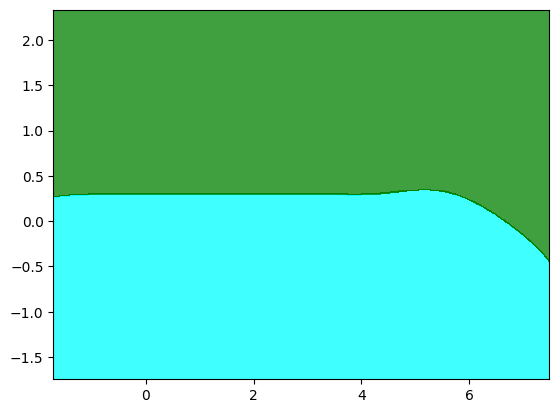

In [ ]:
# Create a contour plot for the decision boundary
from matplotlib.colors import ListedColormap
plt.contourf(x1, x2, Z, alpha=0.75, cmap=ListedColormap(('cyan', 'green')))

(-1.74616134767003, 2.3338386523299737)

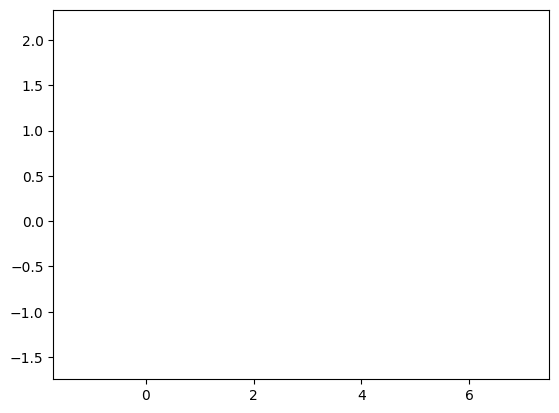

In [ ]:
# Set the plot limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

<ipython-input-32-9b1da08cf0ed>:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_visualization[y_train == j, 0], x_visualization[y_train == j, 1],


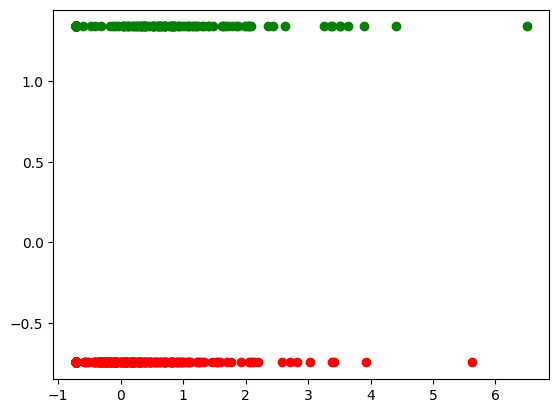

In [ ]:
# Scatter plot the actual training data points
for i, j in enumerate(np.unique(y_train)):
  plt.scatter(x_visualization[y_train == j, 0], x_visualization[y_train == j, 1],
    c=ListedColormap(('red', 'green'))(i), label=j)

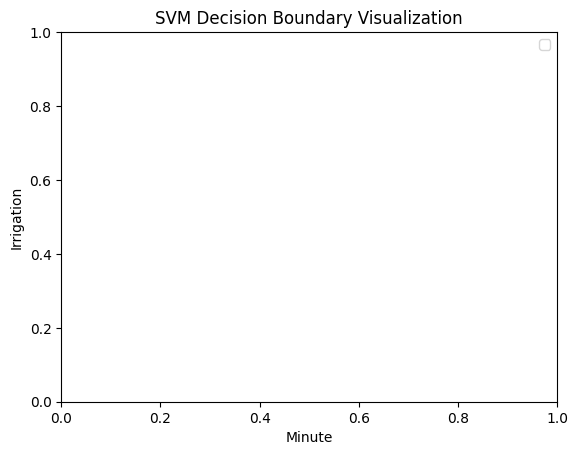

In [ ]:
# Set plot labels and title
plt.title('SVM Decision Boundary Visualization')
plt.xlabel('Minute') # Replace with your actual feature name
plt.ylabel('Irrigation') # Replace with your actual feature name
plt.legend()

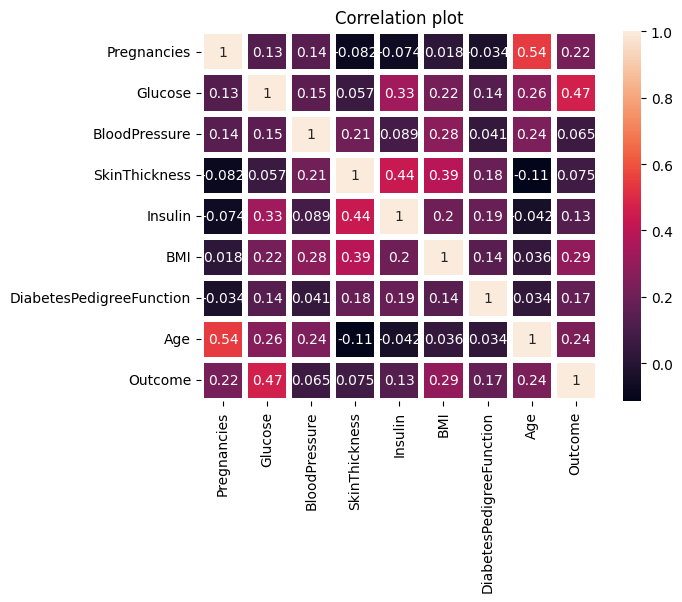

In [ ]:
# Show the plot
import seaborn as sns
corr_plot=sns.heatmap(dataset.corr(),annot=True,linewidths=3)
plt.title("Correlation plot")
plt.show()